In [1]:
import rasterio as rio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Digital Surface Model (DSM)

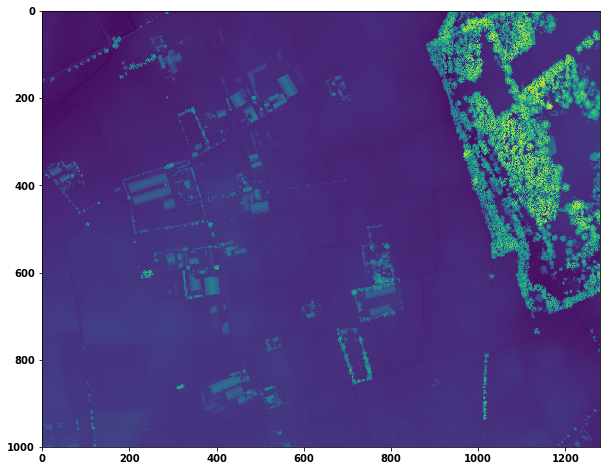

In [68]:
window = rio.windows.Window(8000, 8000, 1280, 2560)
filepath = r'C:\Users\Andrew\Desktop\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k01\GeoTIFF\DHMVIIDSMRAS1m_k01.tif'
with rio.open(filepath) as src:
    subset_DSM = src.read(1, window=window)
    
plt.figure(figsize=(10,16.5))
plt.imshow(subset_DSM)

In [4]:
# Digital Terrain Model (DTM)

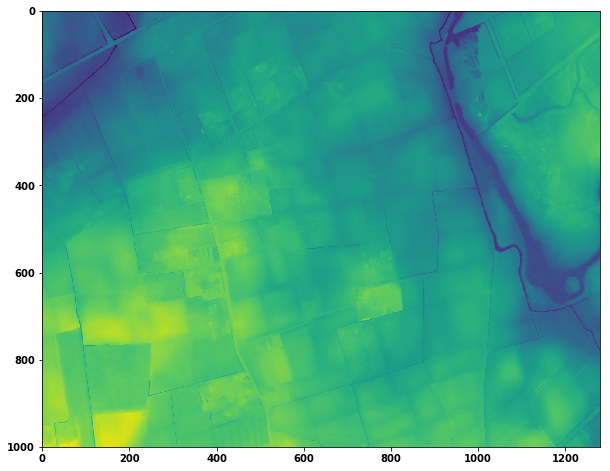

In [70]:
window = rio.windows.Window(8000, 8000, 1280, 2560)
filepath = r'C:\Users\Andrew\Desktop\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k01\GeoTIFF\DHMVIIDTMRAS1m_k01.tif'
with rio.open(filepath) as src:
    subset_DTM = src.read(1, window=window)
    
plt.figure(figsize=(10,16.5))
plt.imshow(subset_DTM)

In [6]:
# Canopy Height Model(CHM) Array of the subset i.e of the cropped raster

In [71]:
# CHM array = DSM array - DTM array

CHM_array = subset_DSM - subset_DTM
CHM_array


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [2.5300007, 2.4899998, 2.4922028, ..., 0.       , 0.       ,
        0.       ],
       [2.6900005, 2.6676388, 2.6722507, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [10]:
# # Plotting using Mayavi

# from mayavi import mlab

# mlab.init_notebook()
# mlab.figure(size=(640, 800), bgcolor=(0.16, 0.28, 0.46))
# mlab.surf(CHM_array, warp_scale=0.2) 
# mlab.show()

(1000, 1280)


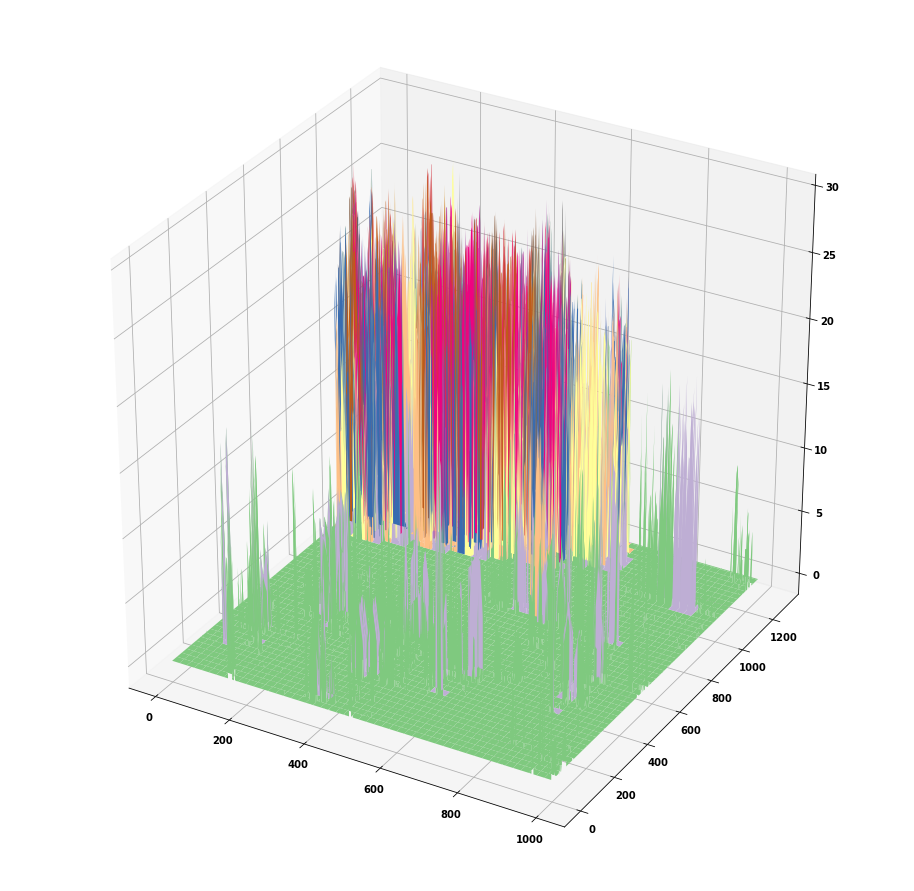

In [72]:
# 3-D Plot

# Assigning the x, y and z values
x = range(0, 1000)
y = range(0, 1280)

x, y = np.meshgrid(x, y, indexing = 'ij')

z = CHM_array    #elevation  
print(z.shape)

# creating a figure for plotting
fig = plt.figure(figsize=(16,16))

# Creating plot
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap = 'Accent')

# Showing the above plot
plt.show()